In [283]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind
from scipy.stats import f_oneway

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso

# a)

In [284]:
df = pd.read_csv("Life Expectancy Data.csv")
print(df.describe(include="all"))
print(df.isnull().sum())
df

            Country         Year      Status  Life expectancy   \
count          2938  2938.000000        2938       2928.000000   
unique          193          NaN           2               NaN   
top     Afghanistan          NaN  Developing               NaN   
freq             16          NaN        2426               NaN   
mean            NaN  2007.518720         NaN         69.224932   
std             NaN     4.613841         NaN          9.523867   
min             NaN  2000.000000         NaN         36.300000   
25%             NaN  2004.000000         NaN         63.100000   
50%             NaN  2008.000000         NaN         72.100000   
75%             NaN  2012.000000         NaN         75.700000   
max             NaN  2015.000000         NaN         89.000000   

        Adult Mortality  infant deaths      Alcohol  percentage expenditure  \
count       2928.000000    2938.000000  2744.000000             2938.000000   
unique              NaN            NaN          N

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [285]:
df = df.dropna()
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

* Records with null value were deleted

In [286]:
df.replace(to_replace=['Developing', 'Developed'],
           value= [0, 1], 
           inplace=True)

encoder = LabelEncoder()
df['Country'] = encoder.fit_transform(df['Country'])

df

C:\Users\navid\AppData\Local\Temp\ipykernel_17848\941962565.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(to_replace=['Developing', 'Developed'],
C:\Users\navid\AppData\Local\Temp\ipykernel_17848\941962565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(to_replace=['Developing', 'Developed'],
C:\Users\navid\AppData\Local\Temp\ipykernel_17848\941962565.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,132,2004,0,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,132,2003,0,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,132,2002,0,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,132,2001,0,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


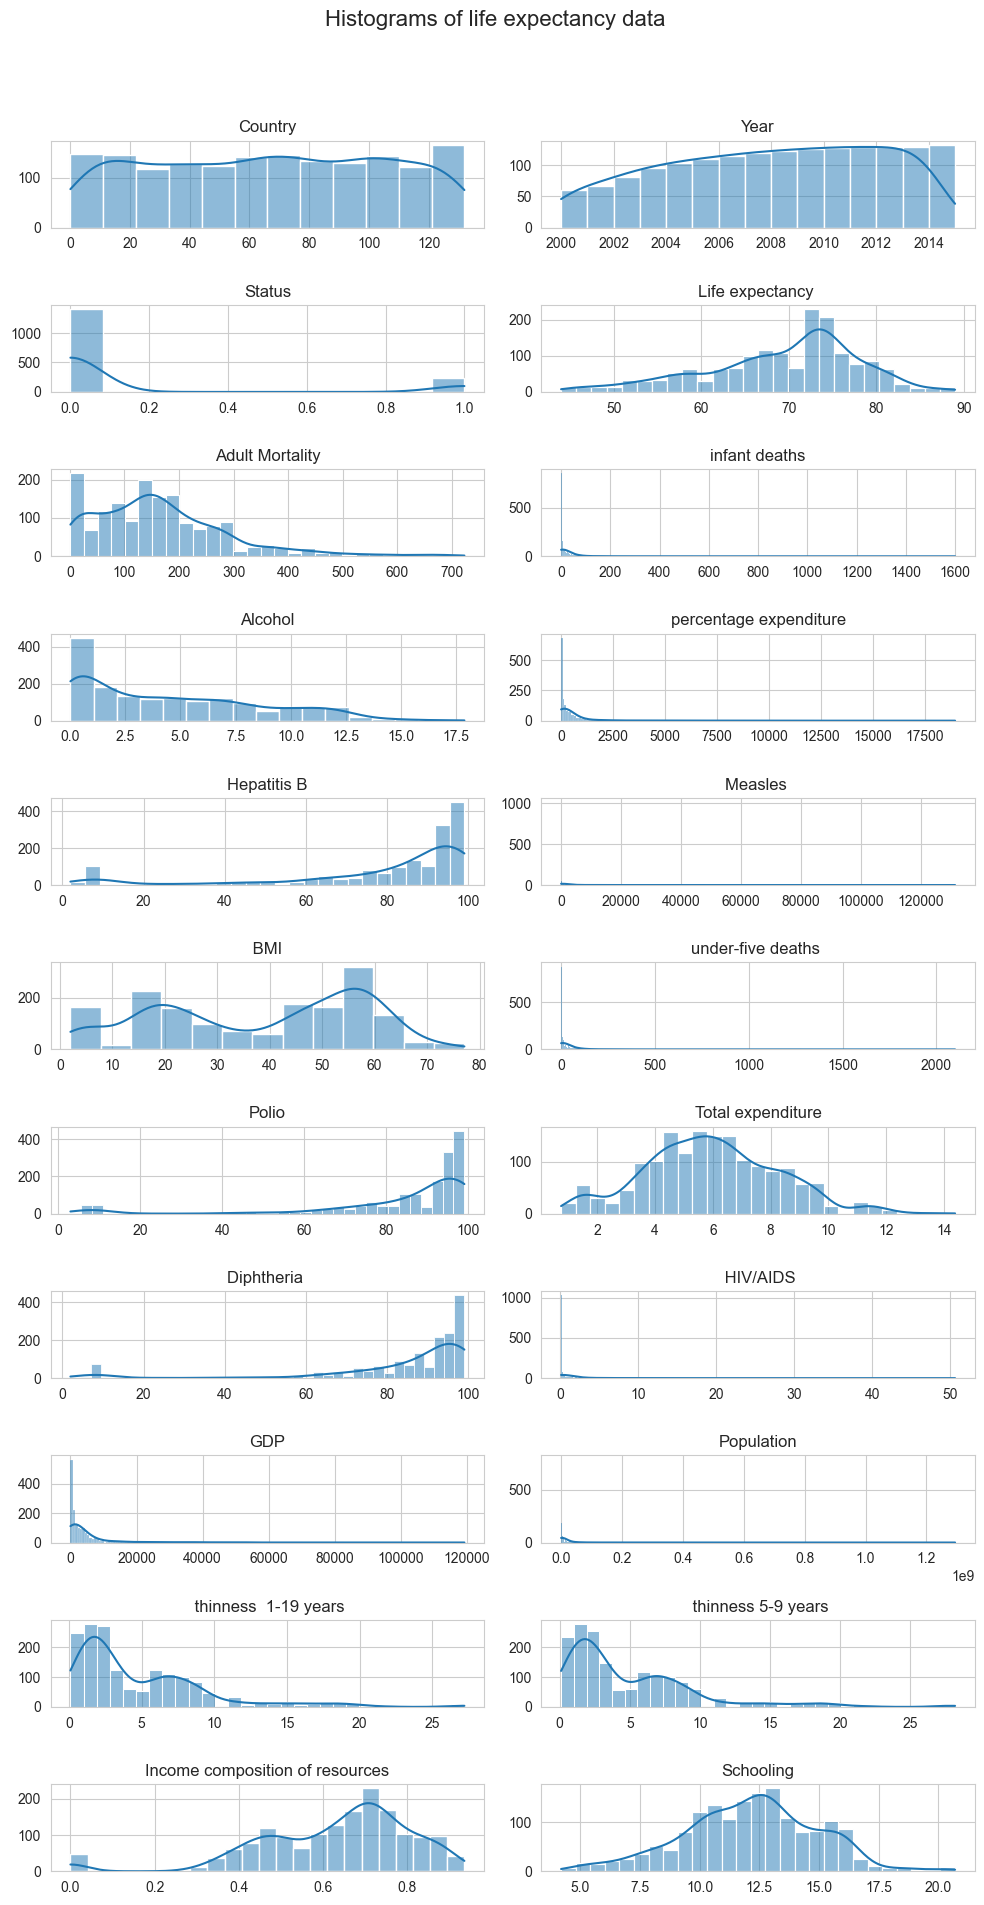

In [287]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create histograms for the numerical columns
fig, axes = plt.subplots(nrows=11, ncols=2, figsize=(10, 20))
fig.suptitle('Histograms of life expectancy data', fontsize=16)

cols = df.columns

for i, col in enumerate(cols):
    sns.histplot(df[col], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(col)
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

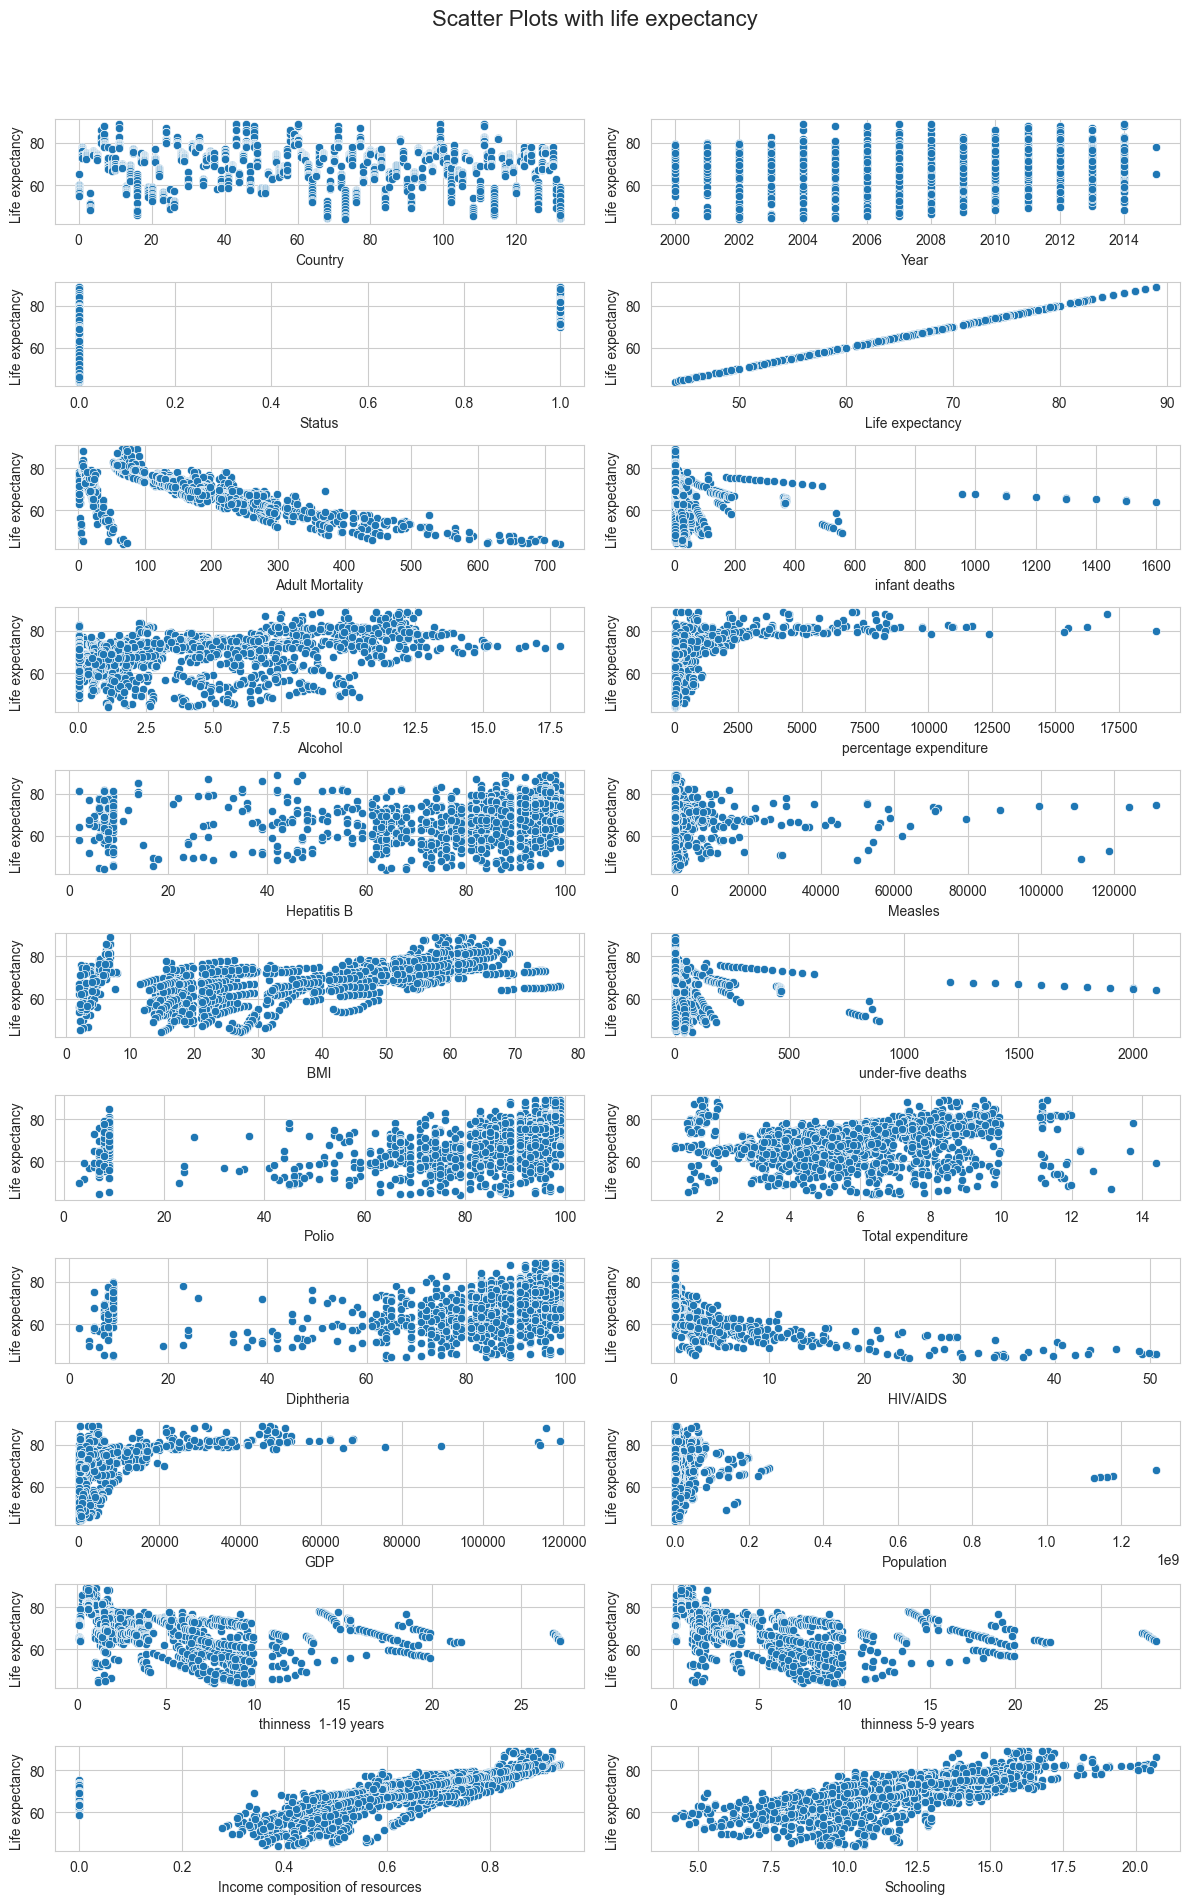

In [288]:
# Scatter plots to observe the relationship with house price
fig, axes = plt.subplots(nrows=11, ncols=2, figsize=(12, 20))
fig.suptitle('Scatter Plots with life expectancy', fontsize=16)
# Scatter plot for each variable against the life expactancy

columns = list(df.columns)

g = 0
for i in range (0 ,len(columns) , 2):
    sns.scatterplot(data=df, x=columns[i], y='Life expectancy ', ax=axes[g, 0])
    sns.scatterplot(data=df, x=columns[i+1], y='Life expectancy ', ax=axes[g, 1])
    g+=1

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# b)
* i) Investigate the relationship between Status and Hepatitis B vaccination rates
    - Null hypothesis: There is no difference in Hepatitis B vaccination rates between Developed and Developing countries.
    - Alternative hypothesis: There is a difference in Hepatitis B vaccination rates between Developed and Developing countries.

In [289]:
developed_countries = df[df['Status'] == 1]['Hepatitis B']
developing_countries = df[df['Status'] == 0]['Hepatitis B']

t_stat, p_value = ttest_ind(developed_countries, developing_countries)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 5.7528271161082225, P-value: 1.044311209232152e-08


* ii) Compare life expectancy between Developed and Developing countries
    - Null hypothesis: There is no difference in life expectancy between Developed and Developing countries.
    - Alternative hypothesis: There is a difference in life expectancy between Developed and Developing countries.

In [290]:
t_stat, p_value = ttest_ind(df[df['Status'] == 1]['Life expectancy '], df[df['Status'] == 0]['Life expectancy '])
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 20.04208196882747, P-value: 3.9228534194275335e-80


* iii) Compare life expectancy across multiple groups defined by the "Year" column
    - Null hypothesis: There is no difference in life expectancy across different years.
    - Alternative hypothesis: There is a difference in life expectancy across different years.

In [291]:
groups = df.groupby('Year')['Life expectancy ']
f_stat, p_value = f_oneway(*[group for name, group in groups])

print(f"F-statistic: {f_stat}, P-value: {p_value}")

F-statistic: 0.9097511982640156, P-value: 0.5527148285584813


# c)

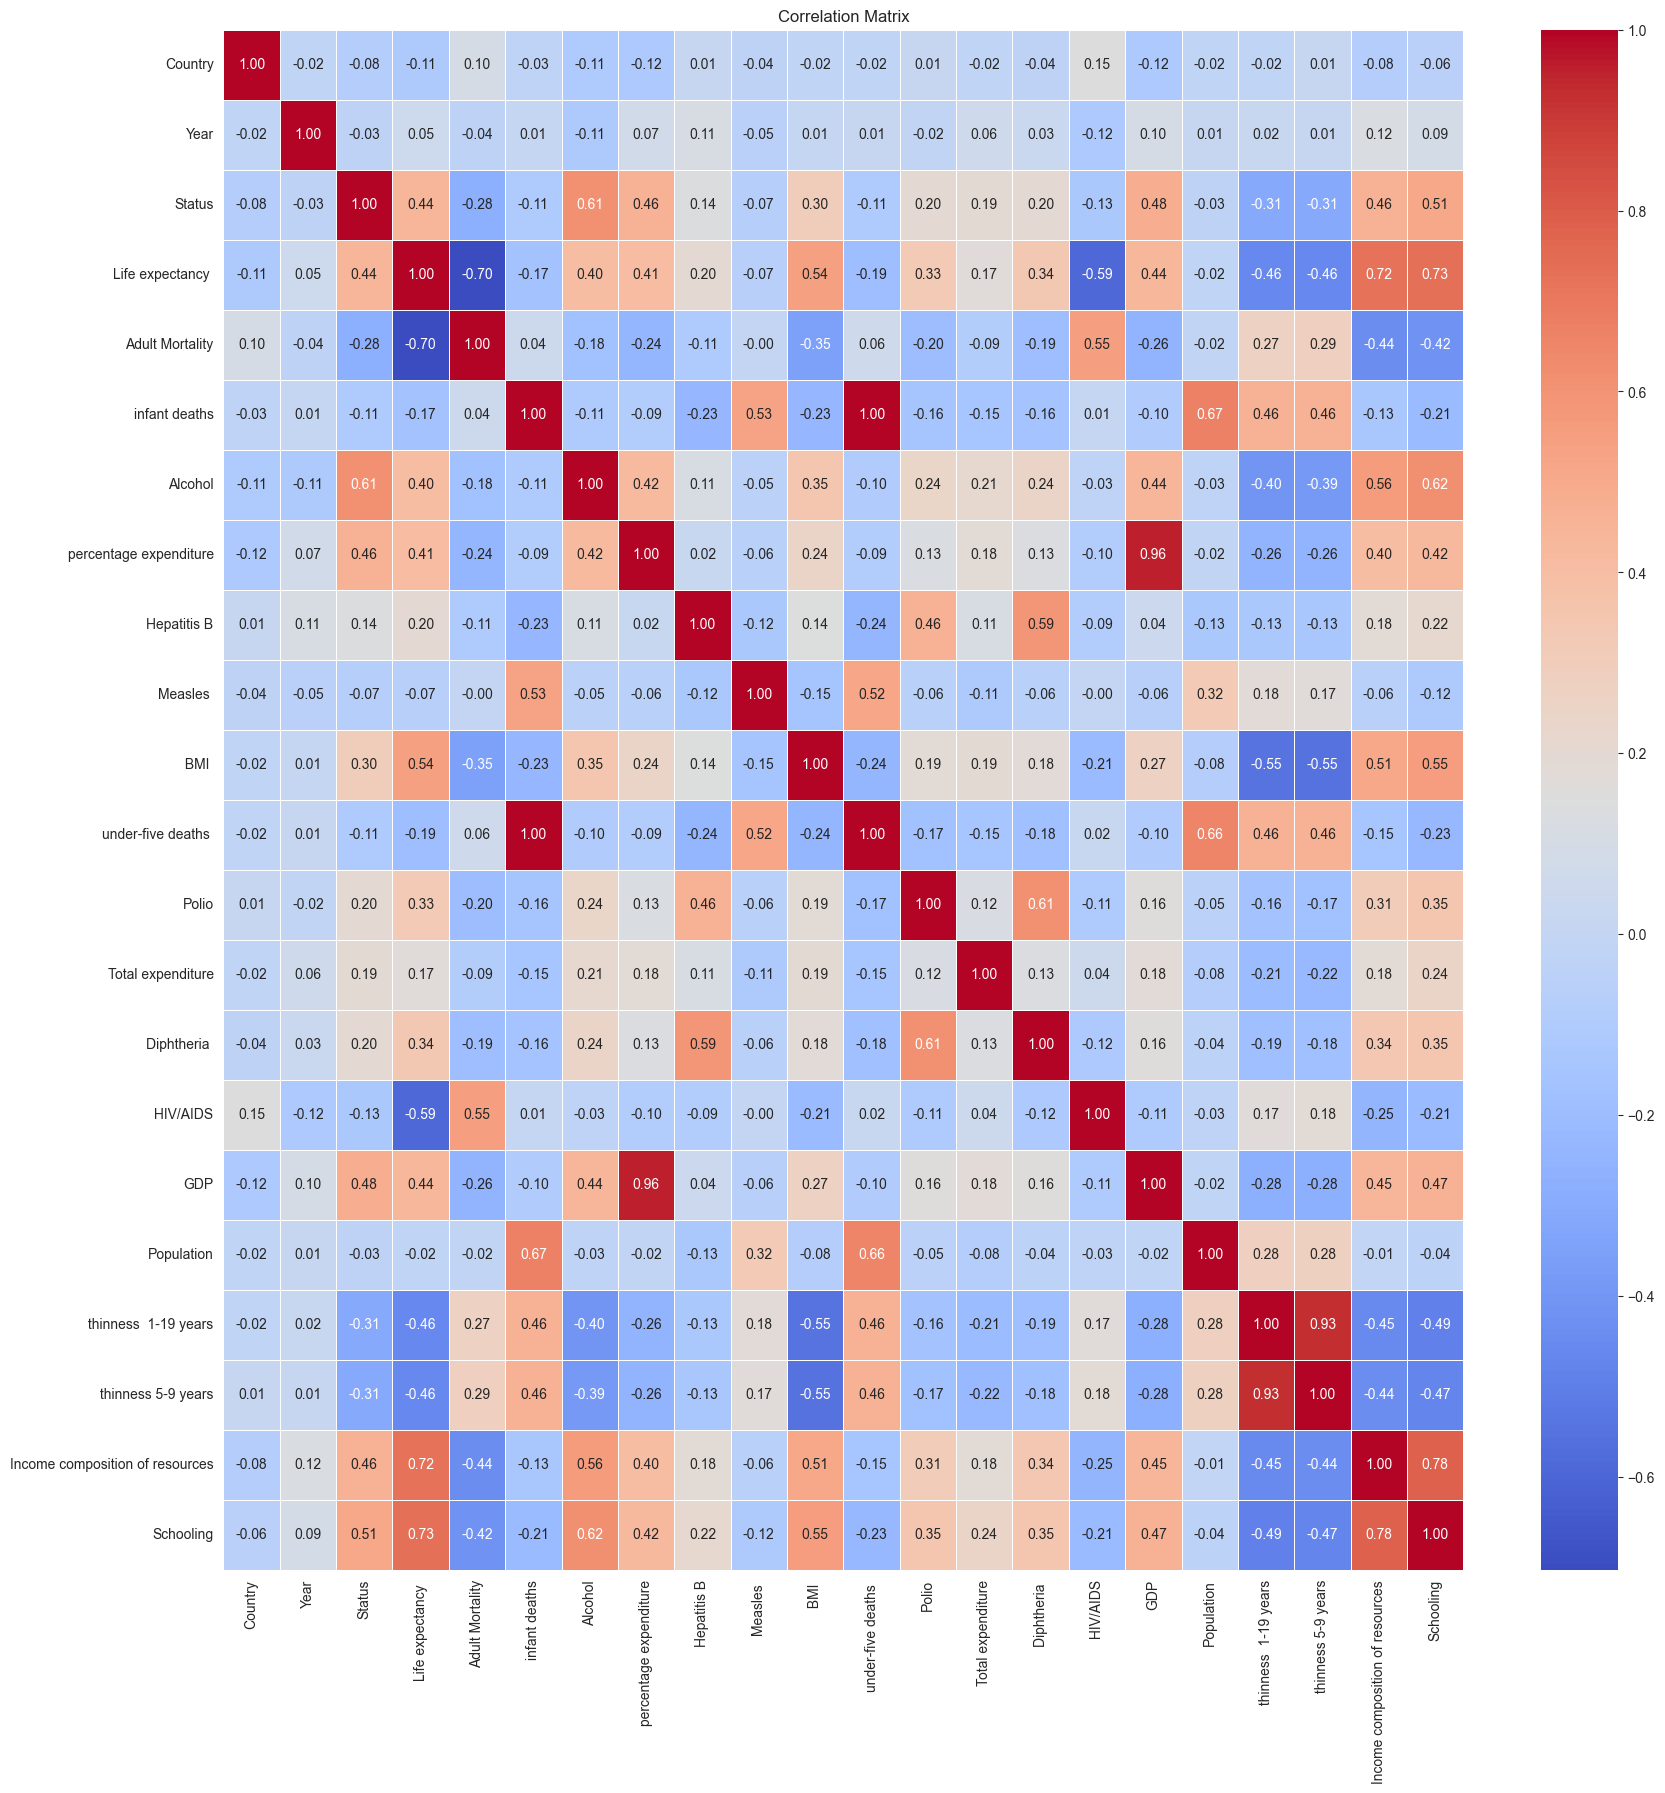

In [292]:
# Correlation matrix
correlation_matrix = df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

* strong correlations with life expectancy : Status , Adult Mortality , Alcohol , percentage expenditure , BMI , Polio , Diphtheria , HIV/AIDS , GDP , thinness 1-19 years , thinness 5-9 years Income composition of resources , Schooling
* weak correlations with life expectancy : Contry , Year , Measles , Population 

# d)

In [293]:
#there is 133 countries, so 0.2 of 133 is 27
train = df[df["Country"] > 27 ]
test = df[df["Country"] <= 27 ]

#train model with country column:
X_train_with_c = train.drop(columns="Life expectancy ")
Y_train = train["Life expectancy "]
X_test_with_c = test.drop(columns="Life expectancy ")
Y_test = test["Life expectancy "]


model_with_c = LinearRegression()
model_with_c.fit(X_train_with_c, Y_train)

#train model without country column:
X_train_without_c = train.drop(columns=["Life expectancy " , "Country"])
X_test_without_c = test.drop(columns=["Life expectancy " , "Country"])

model_without_c = LinearRegression()
model_without_c.fit(X_train_without_c, Y_train)




LinearRegression()

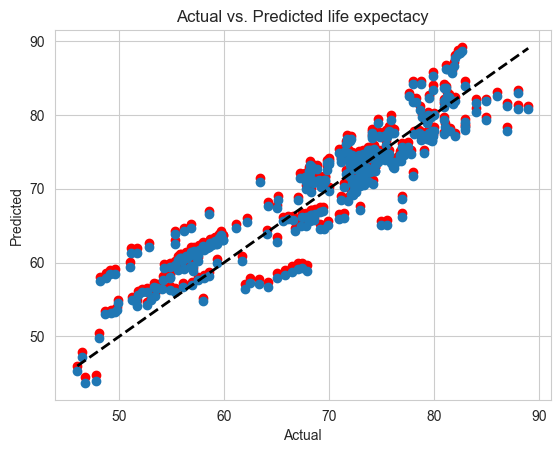

In [294]:
# Visualization: Actual vs. Predicted values

# model with country column
y_pred_with_c = model_with_c.predict(X_test_with_c)
plt.scatter(Y_test, y_pred_with_c , alpha=1, c="red")
# plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
# plt.xlabel('Actual')
# plt.ylabel('Predicted')
# plt.title('Actual vs. Predicted life expectacy')
# plt.show()

# model withouy country column
y_pred_without_c = model_without_c.predict(X_test_without_c)
plt.scatter(Y_test, y_pred_without_c , alpha=1 )
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted life expectacy')
plt.show()

* adding the country column had very little effect
* without country column is better option

# e)

In [295]:
#train model with country column:
X = df.drop(columns="Life expectancy ")
Y = df["Life expectancy "]

X_train, X_test_with_c, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


model_with_c = LinearRegression()
model_with_c.fit(X_train, Y_train)

#train model without country column:
X = df.drop(columns=["Life expectancy " , "Country"])

X_train, X_test_without_c, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


model_without_c = LinearRegression()
model_without_c.fit(X_train, Y_train)


LinearRegression()

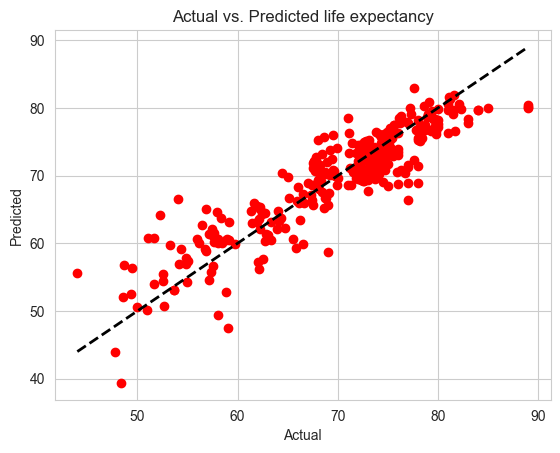

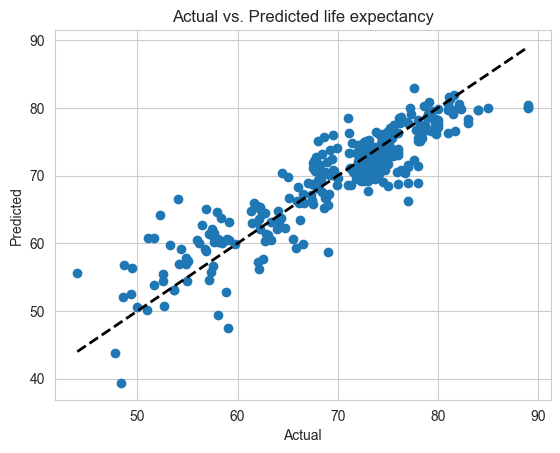

In [296]:
# Visualization: Actual vs. Predicted values

# model with country column
y_pred_with_c = model_with_c.predict(X_test_with_c)
plt.scatter(Y_test, y_pred_with_c , alpha=1, c="red")
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted life expectancy')
plt.show()

# model withouy country column
y_pred_without_c = model_without_c.predict(X_test_without_c)
plt.scatter(Y_test, y_pred_without_c , alpha=1 )
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted life expectancy')
plt.show()

* second method is more efficient

# f)

In [297]:
X = df.drop(columns=['Country' , 'Year' , 'Measles ' , 'Population' , 'Life expectancy '])
Y = df["Life expectancy "]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Model initialization
model = LinearRegression()
model_l1 = Lasso(alpha=0.1)

# Training the model
model.fit(X_train, y_train)
model_l1.fit(X_train, y_train)

c:\Users\navid\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.882e+02, tolerance: 1.039e+01
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

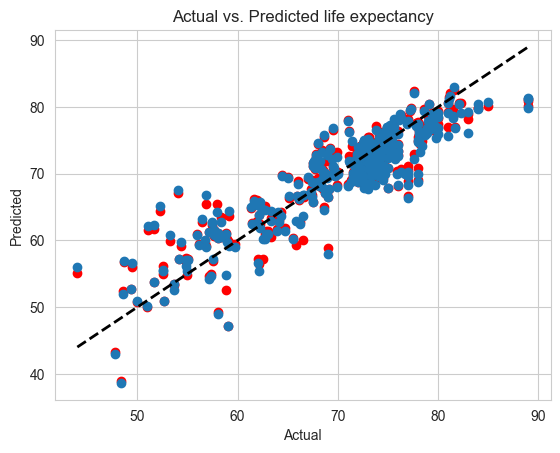

Simple Linear Regression Weights: [ 9.95815654e-01 -1.64952091e-02  9.55943633e-02 -1.14321076e-01
  4.05772137e-04 -8.82991325e-03  2.77530901e-02 -7.22833976e-02
  9.35210757e-03  9.27735886e-02  1.49256747e-02 -4.31743369e-01
 -2.95585489e-06 -4.49739747e-02 -4.21235127e-02  8.88028479e+00
  9.52316594e-01]
L1 Regularized Model Weights: [ 0.00000000e+00 -1.79881787e-02  1.02209272e-01 -1.50394929e-02
  3.73076067e-04 -7.93733647e-03  3.40080041e-02 -7.68364461e-02
  9.13092980e-03  6.87923429e-02  2.06082069e-02 -4.36238763e-01
  1.85429381e-05 -5.54691300e-02 -3.79822575e-02  1.29659565e+00
  1.20141859e+00]


In [299]:
y_pred= model.predict(X_test)
plt.scatter(Y_test, y_pred , alpha=1 , c="red")
# plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
# plt.xlabel('Actual')
# plt.ylabel('Predicted')
# plt.title('Actual vs. Predicted life expectancy')
# plt.show()

y_pred_l1= model_l1.predict(X_test)
plt.scatter(Y_test, y_pred_l1 , alpha=1 )
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted life expectancy')
plt.show()

print("Simple Linear Regression Weights:", model.coef_)
print("L1 Regularized Model Weights:", model_l1.coef_)